In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math

In [2]:
path = "C:/Users/Alexander/Desktop/150420/концентрация_марг"
ratio = 1

In [3]:
def check_name(name):
    if 'info' not in name:
        return True
    else:
        return False

def tofloat(data):
    new_dict = {}
    for key, value in data.items():
        new_value= []
        for wave in value:
            new_value.append(np.log10(list(map(lambda x: float(x), wave)))) 
        new_dict[key] = new_value
    return new_dict

def tofloat_density(data):
    new_dict = {}
    for key, value in data.items():
        new_value = []
        containment = float(key/(key+2))
        for wave in value:
            new_value.append(float(wave[1]))
        new_dict[containment] = np.log10(new_value) + 3
    return new_dict

def density_coeffs(data):
    new_dict = {}
    new_dict["density"] = [key for key in data.keys()]
    return new_dict

def serial_data(path, count):
    SERIALIZE_DATA = {}
    for filename in os.listdir(path):
        if check_name(filename):
            with open(os.path.join(path, filename), 'r') as file:
                spec_params = []
                for line in file.readlines():
                    wave_params = line.split('\t')
                    coeff = wave_params[1].split('\n')
                    spec_params.append([wave_params[0], coeff[0]])
                SERIALIZE_DATA[count] = spec_params
                count += 1
    return SERIALIZE_DATA

In [4]:
data = serial_data(path, ratio)
data_appear = tofloat(data)
data_density = tofloat_density(data)
# print(data)

                0         1         2         3         4         5   \
0.333333  1.619141  1.597415  1.579507  1.569135  1.564096  1.566659   
0.500000  2.002715  1.983991  1.964699  1.947999  1.931834  1.916393   
0.600000  2.148988  2.126459  2.109919  2.095225  2.081243  2.065931   
0.666667  2.272199  2.251346  2.232861  2.215262  2.197509  2.180648   
0.714286  2.367753  2.350231  2.336350  2.322238  2.303939  2.283896   
0.750000  2.437219  2.419503  2.401888  2.386149  2.370358  2.354293   
0.777778  2.518869  2.498874  2.481881  2.467019  2.452018  2.436498   
0.800000  2.585194  2.569445  2.553745  2.540129  2.526480  2.511949   
0.818182  2.660231  2.647447  2.636287  2.624215  2.611887  2.598147   
0.833333  2.700124  2.686233  2.672910  2.660385  2.648373  2.635096   
0.846154  2.781340  2.767358  2.756309  2.746169  2.736457  2.724209   
0.857143  2.799805  2.787636  2.774998  2.765248  2.754945  2.744499   
0.866667  2.818077  2.806447  2.796419  2.786661  2.776914  2.76

Text(0, 0.5, 'Оптическая плотность')

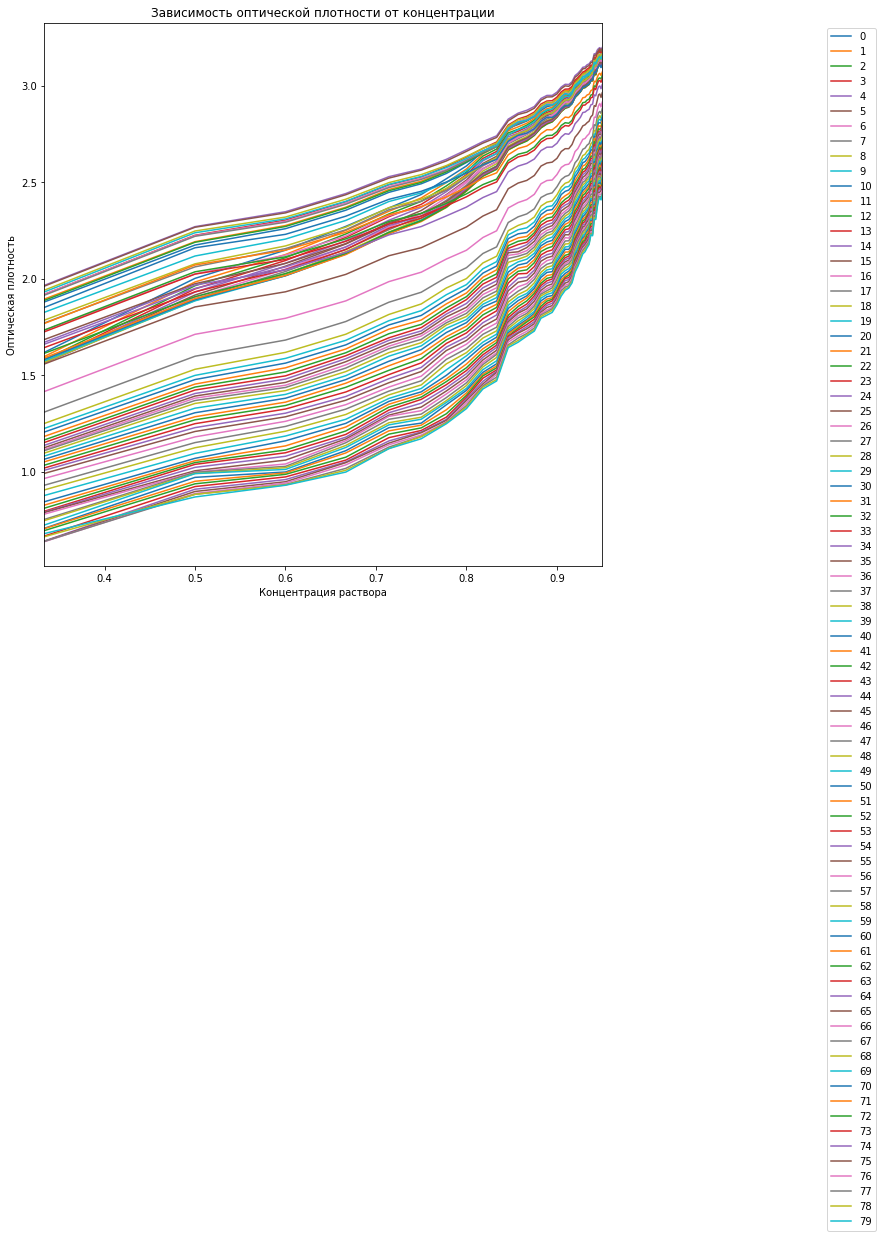

In [5]:
df = pd.DataFrame(data_density, columns=[key for key in data_density.keys()])
df = df.T
print(df, '\n', df.shape)
graph = df.plot(title="Зависимость оптической плотности от концентрации", figsize=(10, 10))
graph.legend(bbox_to_anchor=(1.5, 1))
graph.set_xlabel("Концентрация раствора")
graph.set_ylabel("Оптическая плотность")

In [6]:
df_coeffs = density_coeffs(data_density)
df_coeffs_dens = pd.DataFrame(df_coeffs, columns=['density'])
#print(df_coeffs_dens)

In [7]:
X_train = df.iloc[0:15, :] #train data 15x38
Y_train = df_coeffs_dens[0:15] #train data 15x38
#print('Data X_train: \n', X_train)
#print('Data Y_train: \n', Y_train)
MLR = linear_model.LinearRegression()
MLR.fit(X_train,Y_train)
print('Intercept: \n', MLR.intercept_)
print('Coefficients: \n', MLR.coef_)

Intercept: 
 [-1.01489671]
Coefficients: 
 [[ 0.03245285 -0.00481296 -0.03576061 -0.03863058  0.01850829  0.10318401
   0.11373824  0.11884869  0.09523554  0.10449328 -0.03780833 -0.07628839
   0.00324688  0.00499745  0.06491346  0.07841794  0.05178527  0.00615992
   0.04056071  0.04611337  0.04711318  0.00948507  0.03650322  0.02935514
   0.06874539  0.0400743   0.09944812  0.04844035 -0.01028998 -0.09077064
  -0.05796745 -0.03676554 -0.0155523  -0.00301513  0.08134242  0.01683583
   0.01625969  0.06175495  0.05811327  0.03733205 -0.03700863 -0.08076256
  -0.14478922 -0.17091207  0.0132589   0.06262321  0.01927987  0.01038277
   0.04012984  0.1153473   0.05203314  0.11735194  0.00341749 -0.09175412
  -0.09164173 -0.0968681  -0.05397307  0.02025544 -0.01072332  0.04141433
   0.11435875  0.20023255  0.03632948 -0.1526923  -0.10748451  0.16442722
   0.19130486  0.00310838 -0.06555087 -0.09089392 -0.184888    0.04588427
  -0.04383158 -0.20701168 -0.15514475  0.0846488   0.03374206 -0.1530

In [8]:
X_test = df.iloc[16:38, :]
Y_pred = MLR.predict(X_test)
# print('Ypred: \n',Y_pred)
X_test_2 = df
Y_pred_2 = MLR.predict(X_test_2)
# print('Ypred_2: \n',Y_pred_2)

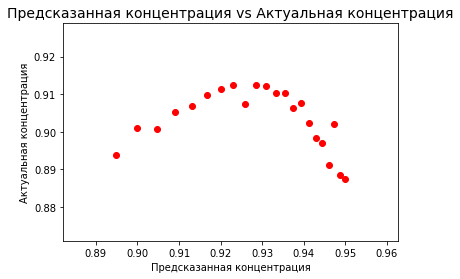

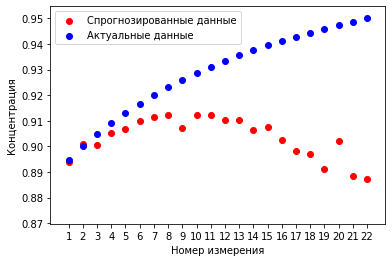

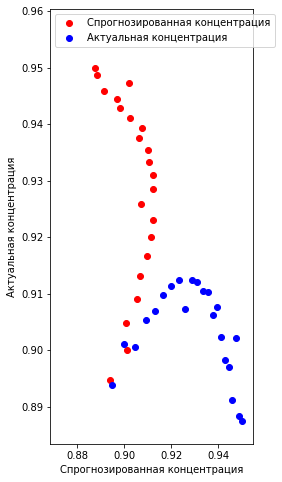

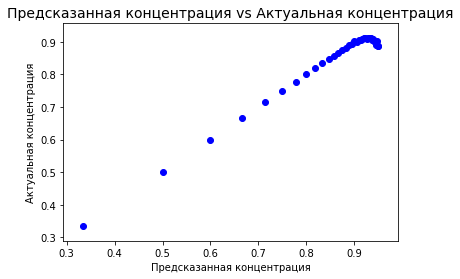

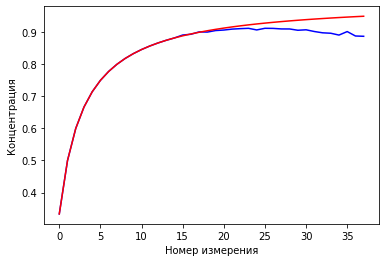

In [9]:
plt.figure(1)
plt.scatter(df_coeffs_dens[16:38], Y_pred, color='red')
plt.title('Предсказанная концентрация vs Актуальная концентрация', fontsize=14)
plt.xlabel('Предсказанная концентрация')
plt.ylabel('Актуальная концентрация')
fig = plt.figure()
ax = fig.add_subplot(111)
axis_x = range(1,len(Y_pred)+1)
ax.scatter(axis_x, Y_pred, color='red', label='Спрогнозированные данные')
ax.scatter(axis_x, df_coeffs_dens[16:38], color='blue', label='Актуальные данные')
plt.legend(loc='upper left')
plt.xticks([i for i in axis_x])
plt.xlabel('Номер измерения')
plt.ylabel('Концентрация')
# plt.scatter(y_predict_data, y_test_data, color='yellow')
plt.show()
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
fig1.set_figheight(8)
fig1.set_figwidth(8)
ax1.scatter(Y_pred, df_coeffs_dens[16:38], color='red', label='Спрогнозированная концентрация')
ax1.scatter(df_coeffs_dens[16:38], Y_pred, color='blue', label='Актуальная концентрация')
plt.legend(loc='upper left')
plt.xlabel('Спрогнозированная концентрация')
plt.ylabel('Актуальная концентрация')
plt.show()
plt.figure(2)
plt.scatter(df_coeffs_dens, Y_pred_2, color='blue')
plt.title('Предсказанная концентрация vs Актуальная концентрация', fontsize=14)
plt.xlabel('Предсказанная концентрация')
plt.ylabel('Актуальная концентрация')
plt.show()
plt.figure(3) #расхождение в предикции
plt.plot(Y_pred_2, color='blue')
plt.plot(df_coeffs_dens, color='red')
plt.xlabel('Номер измерения')
plt.ylabel('Концентрация')
plt.show()

In [10]:
rmsd = np.sqrt(mean_squared_error(df_coeffs_dens[16:38], Y_pred))
r2_value = r2_score(df_coeffs_dens[16:38], Y_pred)
Y_actual = df_coeffs_dens
Y_full = Y_pred_2
r2_value_full = r2_score(Y_actual, Y_full)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)
print("R^2 value for full model: \n", r2_value_full)

Root Mean Square Error 
 0.03214747224748263
R^2 Value: 
 -2.9142154443715804
R^2 value for full model: 
 0.9659703320434326


In [11]:
interpolateMLR = linear_model.LinearRegression()
x_train_data = df.iloc[0:38:2, :] #train data odd
y_train_data = df_coeffs_dens.iloc[0:38:2]
# print(x_train_data, '\n', y_train_data)
x_test_data = df.iloc[1:38:2, :] #test data mean
y_test_data = df_coeffs_dens.iloc[1:38:2]
# print(x_test_data, '\n', y_test_data)

In [12]:
interpolateMLR.fit(x_train_data,y_train_data)
print('Intercept: \n', MLR.intercept_)
print('Coefficients: \n', MLR.coef_)

Intercept: 
 [-1.01489671]
Coefficients: 
 [[ 0.03245285 -0.00481296 -0.03576061 -0.03863058  0.01850829  0.10318401
   0.11373824  0.11884869  0.09523554  0.10449328 -0.03780833 -0.07628839
   0.00324688  0.00499745  0.06491346  0.07841794  0.05178527  0.00615992
   0.04056071  0.04611337  0.04711318  0.00948507  0.03650322  0.02935514
   0.06874539  0.0400743   0.09944812  0.04844035 -0.01028998 -0.09077064
  -0.05796745 -0.03676554 -0.0155523  -0.00301513  0.08134242  0.01683583
   0.01625969  0.06175495  0.05811327  0.03733205 -0.03700863 -0.08076256
  -0.14478922 -0.17091207  0.0132589   0.06262321  0.01927987  0.01038277
   0.04012984  0.1153473   0.05203314  0.11735194  0.00341749 -0.09175412
  -0.09164173 -0.0968681  -0.05397307  0.02025544 -0.01072332  0.04141433
   0.11435875  0.20023255  0.03632948 -0.1526923  -0.10748451  0.16442722
   0.19130486  0.00310838 -0.06555087 -0.09089392 -0.184888    0.04588427
  -0.04383158 -0.20701168 -0.15514475  0.0846488   0.03374206 -0.1530

Intercept: 
 [-1.01489671]
Coefficients: 
 [[ 0.03245285 -0.00481296 -0.03576061 -0.03863058  0.01850829  0.10318401
   0.11373824  0.11884869  0.09523554  0.10449328 -0.03780833 -0.07628839
   0.00324688  0.00499745  0.06491346  0.07841794  0.05178527  0.00615992
   0.04056071  0.04611337  0.04711318  0.00948507  0.03650322  0.02935514
   0.06874539  0.0400743   0.09944812  0.04844035 -0.01028998 -0.09077064
  -0.05796745 -0.03676554 -0.0155523  -0.00301513  0.08134242  0.01683583
   0.01625969  0.06175495  0.05811327  0.03733205 -0.03700863 -0.08076256
  -0.14478922 -0.17091207  0.0132589   0.06262321  0.01927987  0.01038277
   0.04012984  0.1153473   0.05203314  0.11735194  0.00341749 -0.09175412
  -0.09164173 -0.0968681  -0.05397307  0.02025544 -0.01072332  0.04141433
   0.11435875  0.20023255  0.03632948 -0.1526923  -0.10748451  0.16442722
   0.19130486  0.00310838 -0.06555087 -0.09089392 -0.184888    0.04588427
  -0.04383158 -0.20701168 -0.15514475  0.0846488   0.03374206 -0.1530

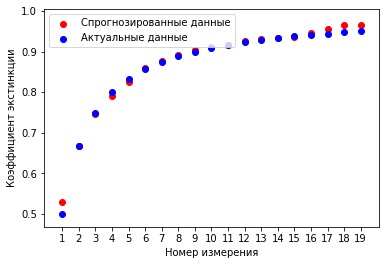

In [13]:
y_predict_data = interpolateMLR.predict(x_test_data)
rmsd = np.sqrt(mean_squared_error(y_test_data, y_predict_data))
r2_value = r2_score(y_test_data, y_predict_data)
print('Intercept: \n', MLR.intercept_)
print('Coefficients: \n', MLR.coef_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)
fig = plt.figure()
ax = fig.add_subplot(111)
axis_x = range(1,20)
ax.scatter(axis_x, y_predict_data, color='red', label='Спрогнозированные данные')
ax.scatter(axis_x, y_test_data, color='blue', label='Актуальные данные')
plt.legend(loc='upper left')
plt.xticks([i for i in axis_x])
plt.xlabel('Номер измерения')
plt.ylabel('Коэффициент экстинкции')
# plt.scatter(y_predict_data, y_test_data, color='yellow')
plt.show()

In [14]:
"""Now take full model and try to predict results of zel"""

'Now take full model and try to predict results of zel'

In [15]:
X_train_full = df 
Y_train_full = df_coeffs_dens
full_mlr = linear_model.LinearRegression()
full_mlr.fit(X_train_full,Y_train_full)
print('Intercept: \n', full_mlr.intercept_)
print('Coefficients: \n', full_mlr.coef_)

Intercept: 
 [-0.61490257]
Coefficients: 
 [[ 0.43401288  0.37403102 -0.02508543 -0.84134008  0.01893029  0.69469844
  -0.34692887 -0.09776149  0.16115751  0.26101983  0.01555817 -0.4880013
   0.07485865  0.18841261  0.15749064  0.36637545  0.22617109 -0.07746701
  -0.68783615 -0.54691506  0.03601106  0.31820674  0.16147641 -0.34129108
  -0.16802292  0.12267803  0.03947005 -0.40945118  0.02343836  0.13653629
  -0.06163787  0.42856976  0.33186453 -0.1648427  -0.12622823  0.60261663
  -0.0434486   0.33816433  0.57523881 -0.39663547 -0.24338314  0.05924095
  -0.28892447  0.56972727 -0.14665036 -0.24743699  0.1052279  -0.54793893
   0.0549583   0.47761415  0.59106334 -0.44918604 -0.08801758 -0.23043278
  -0.00981159 -0.42351282 -0.18063882  0.17916162  0.0684947   0.22028844
   0.1779686   0.0426097  -0.26104501 -0.16358001 -0.09813289  0.22007397
   0.61415487 -0.15492427 -0.12511167 -0.31042261  0.10014955 -0.02724757
  -0.10875984 -0.4952429   0.31855707  0.06052435  0.22116344 -0.31873

In [16]:
path_zel = "C:/Users/Alexander/Desktop/150420/rec_zel"
data_zel = serial_data(path_zel, ratio)
data_zel_density = tofloat_density(data_zel)
zel_coeffs = density_coeffs(data_zel_density)
df_zel_coeffs = pd.DataFrame(zel_coeffs, columns=['density'])
print(df_zel_coeffs)

     density
0   0.333333
1   0.500000
2   0.600000
3   0.666667
4   0.714286
5   0.750000
6   0.777778
7   0.800000
8   0.818182
9   0.833333
10  0.846154
11  0.857143
12  0.866667
13  0.875000
14  0.882353
15  0.888889
16  0.894737
17  0.900000
18  0.904762
19  0.909091
20  0.913043
21  0.916667
22  0.920000
23  0.923077
24  0.925926
25  0.928571
26  0.931034
27  0.933333
28  0.935484
29  0.937500
30  0.939394
31  0.941176
32  0.942857
33  0.944444
34  0.945946
35  0.947368
36  0.948718
37  0.950000


Text(0, 0.5, 'Оптическая плотность')

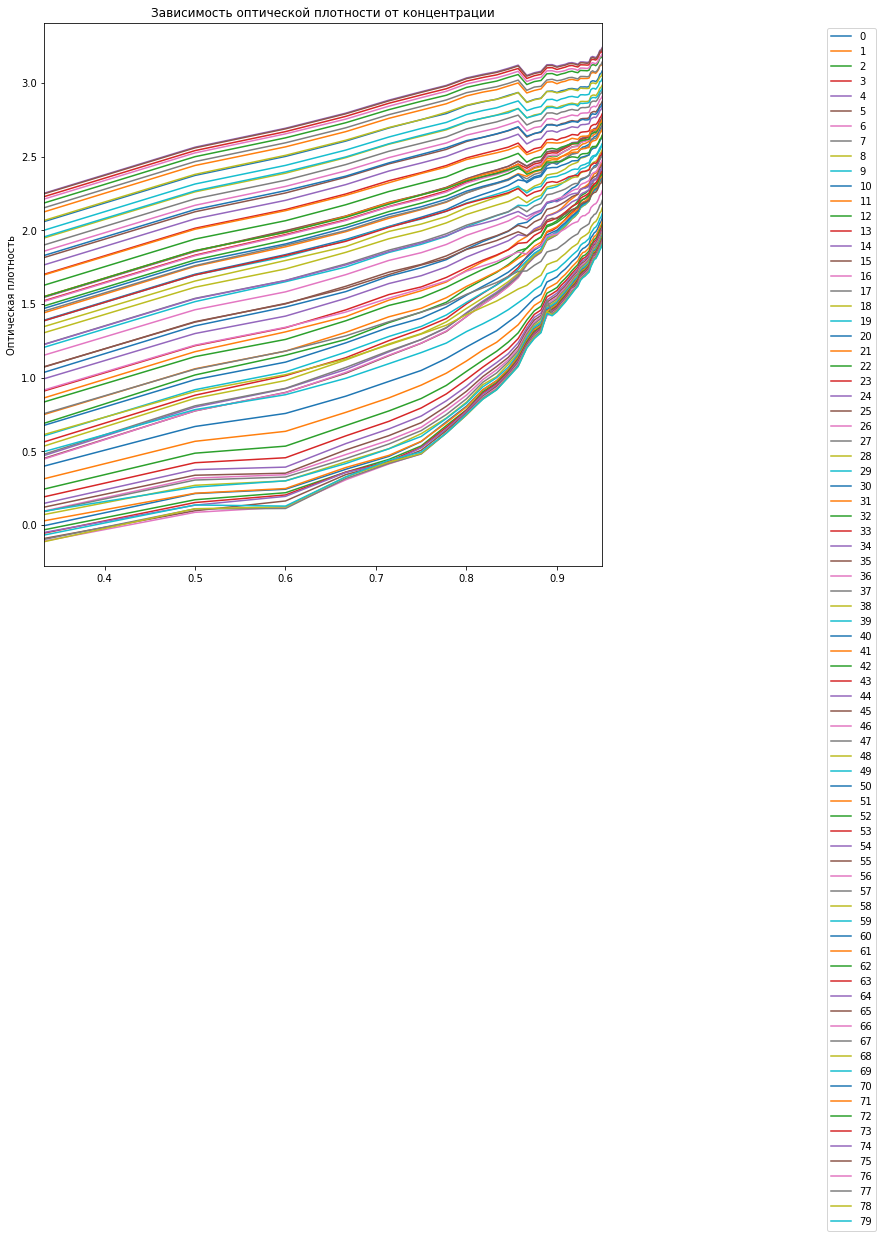

In [17]:
df_zel = pd.DataFrame(data_zel_density, columns=[key for key in data_zel_density.keys()])
df_zel = df_zel.T
graph_zel = df_zel.plot(title="Зависимость оптической плотности от концентрации", figsize=(10, 10))
graph_zel.legend(bbox_to_anchor=(1.5, 1))
graph_zel.set_ylabel("Оптическая плотность")

Intercept: 
 [-1.01489671]
Coefficients: 
 [[ 0.03245285 -0.00481296 -0.03576061 -0.03863058  0.01850829  0.10318401
   0.11373824  0.11884869  0.09523554  0.10449328 -0.03780833 -0.07628839
   0.00324688  0.00499745  0.06491346  0.07841794  0.05178527  0.00615992
   0.04056071  0.04611337  0.04711318  0.00948507  0.03650322  0.02935514
   0.06874539  0.0400743   0.09944812  0.04844035 -0.01028998 -0.09077064
  -0.05796745 -0.03676554 -0.0155523  -0.00301513  0.08134242  0.01683583
   0.01625969  0.06175495  0.05811327  0.03733205 -0.03700863 -0.08076256
  -0.14478922 -0.17091207  0.0132589   0.06262321  0.01927987  0.01038277
   0.04012984  0.1153473   0.05203314  0.11735194  0.00341749 -0.09175412
  -0.09164173 -0.0968681  -0.05397307  0.02025544 -0.01072332  0.04141433
   0.11435875  0.20023255  0.03632948 -0.1526923  -0.10748451  0.16442722
   0.19130486  0.00310838 -0.06555087 -0.09089392 -0.184888    0.04588427
  -0.04383158 -0.20701168 -0.15514475  0.0846488   0.03374206 -0.1530

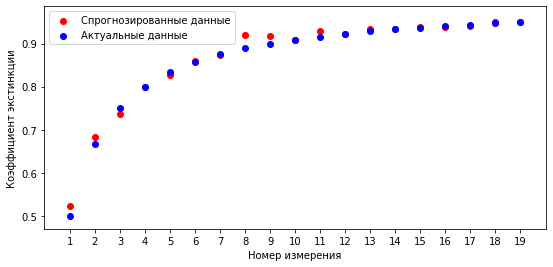

In [18]:
zelMlr = linear_model.LinearRegression()
x_train_data = df_zel.iloc[0:38:2, :] #train data odd
y_train_data = df_zel_coeffs.iloc[0:38:2]
# print(x_train_data, '\n', y_train_data)
x_test_data = df_zel.iloc[1:38:2, :] #test data mean
y_test_data = df_zel_coeffs.iloc[1:38:2]
# print(x_test_data, '\n', y_test_data)
zelMlr.fit(x_train_data,y_train_data)
print('Intercept: \n', MLR.intercept_)
print('Coefficients: \n', MLR.coef_)
y_predict_data = zelMlr.predict(x_test_data)
rmsd = np.sqrt(mean_squared_error(y_test_data, y_predict_data))
r2_value = r2_score(y_test_data, y_predict_data)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(9)
ax = fig.add_subplot(211)
axis_x = range(1,20)
ax.scatter(axis_x, y_predict_data, color='red', label='Спрогнозированные данные')
ax.scatter(axis_x, y_test_data, color='blue', label='Актуальные данные')
plt.legend(loc='upper left')
plt.xticks([i for i in axis_x])
plt.xlabel('Номер измерения')
plt.ylabel('Коэффициент экстинкции')
# plt.scatter(y_predict_data, y_test_data, color='yellow')
plt.show()

In [19]:
"""PCA to speed up data"""

'PCA to speed up data'

In [47]:
from collections import defaultdict

def get_wave_lengths(data):
    wave_lengths, wave_data = [], defaultdict(list)
    for key in data.keys():
        for item in range(len(data[key])):
            wave_key, wave_value = data[key][item][0], float(data[key][item][1])
            wave_data[wave_key].append(wave_value)
    return wave_data

def form_dataset(data):
    wave_lengths_extinction = dict(get_wave_lengths(data))
    # print(len(wave_lengths_extinction['404.954']))
    wave_lengths = [key for key in wave_lengths_extinction.keys()]
    extinction_coeffs = ['D' + str(i) for i in range(1,39)]
    containment = ['C']
    dataPCA = pd.DataFrame(columns=[*extinction_coeffs, *containment], index=wave_lengths)
    current_containment = 0
    for wave in dataPCA.index:
        current_containment += 1
        dataPCA.loc[wave, 'D1':'D38'] = -np.log10(wave_lengths_extinction[wave])
        dataPCA.loc[wave, 'C'] = current_containment/(current_containment+2)
    return dataPCA

In [48]:
dataPCA_marg = form_dataset(data)
dataPCA_zel = form_dataset(data_zel)

In [49]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [65]:
def pcaExplanation(dataPCA):
    scaled_data = preprocessing.scale(dataPCA.T)
    pca = PCA()
    pca.fit(scaled_data)
    pca_data = pca.transform(scaled_data)
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    plt.figure(1)
    plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Процент объясненной дисперсии')
    plt.xlabel('Главная компонента')
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

    pca_df = pd.DataFrame(pca_data, columns=labels)

    plt.figure(2)
    plt.scatter(pca_df.PC1, pca_df.PC2)
    plt.title('PCA')
    plt.xlabel('ГК1 - {0}%'.format(per_var[0]))
    plt.ylabel('ГК2 - {0}%'.format(per_var[1]))

    for sample in pca_df.index:
        plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    plt.show()
    loading_scores = pd.Series(pca.components_[0])
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    top_10_components = sorted_loading_scores[0:10].index.values
    print(loading_scores[top_10_components])
    print(pca_df)

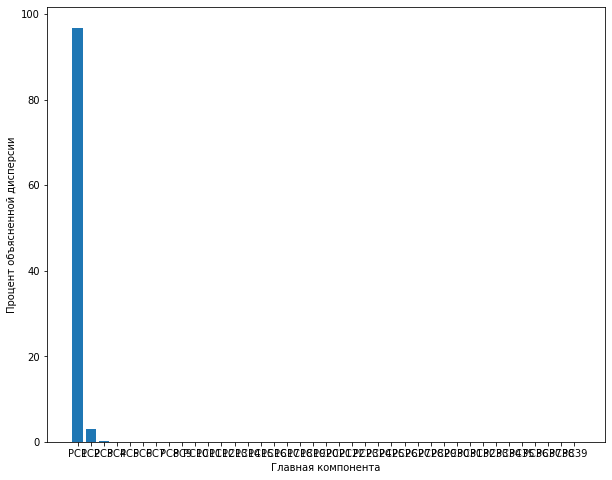

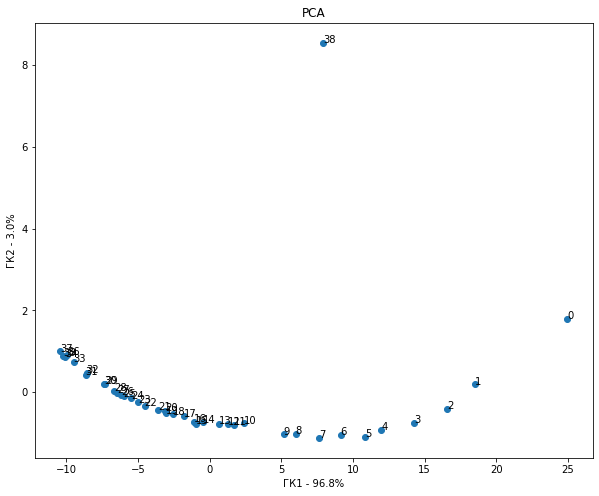

37    0.113624
38    0.113596
39    0.113555
36    0.113542
40    0.113510
41    0.113467
42    0.113423
43    0.113379
44    0.113326
45    0.113270
dtype: float64
          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   24.934352  1.794446  1.266955  0.352444  0.072620 -0.009977 -0.022966   
1   18.494847  0.192219  0.774515 -0.120037 -0.164845  0.014787  0.019401   
2   16.557181 -0.407642  0.265225 -0.102612  0.030948  0.045481  0.073943   
3   14.281588 -0.753040  0.102165 -0.168075 -0.010884  0.010771 -0.005707   
4   11.968345 -0.931040  0.056340 -0.139619 -0.089073 -0.075232 -0.071228   
5   10.822004 -1.093834 -0.113219 -0.144028  0.024979 -0.021776 -0.019419   
6    9.140714 -1.039498 -0.227620 -0.166572  0.216008 -0.004034 -0.005311   
7    7.661977 -1.116020 -0.391366 -0.007548  0.054231 -0.033277  0.034626   
8    6.010272 -1.027680 -0.573940  0.049717  0.024559  0.032208 -0.012542   
9    5.157762 -1.030072 -0.601951  0.058569 -0.015122  0.001750 -

In [66]:
pcaExplanation(dataPCA_marg)

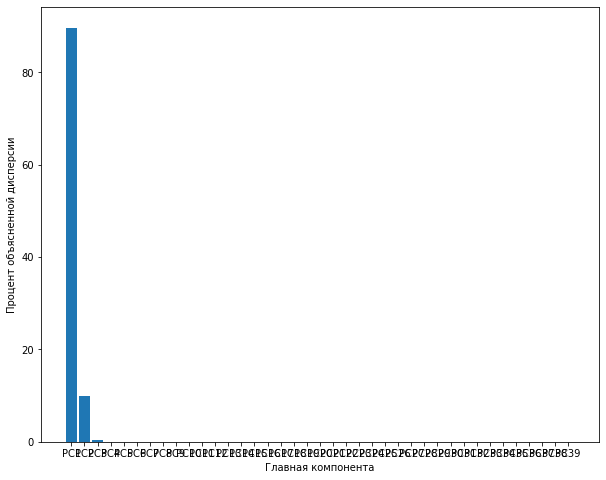

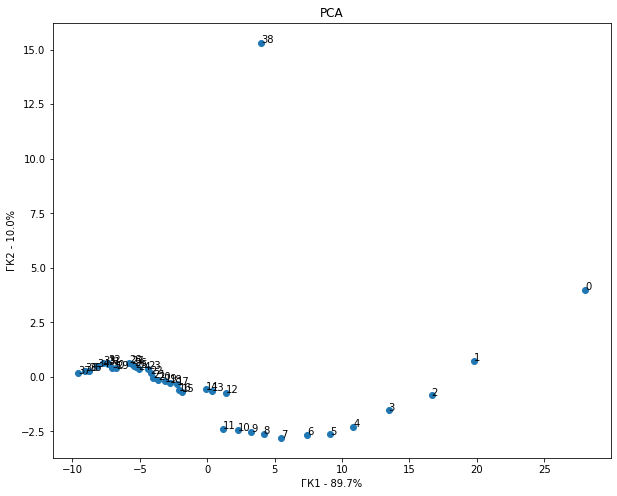

8     0.117903
26    0.117844
9     0.117842
27    0.117841
25    0.117687
3     0.117687
7     0.117653
2     0.117645
28    0.117619
54    0.117508
dtype: float64
          PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0   28.034961   3.983124  1.643437 -0.003102 -0.131752 -0.003411 -0.024153   
1   19.800936   0.722930  0.405661  0.122463 -0.045431  0.000142  0.068256   
2   16.646154  -0.846794 -0.345045  0.293465  0.153980 -0.082325 -0.035989   
3   13.465358  -1.532850 -0.435386  0.138860  0.028077  0.065071 -0.054440   
4   10.840732  -2.276424 -0.699092  0.192192  0.035956  0.105843 -0.011536   
5    9.103747  -2.629933 -0.740232  0.115542  0.016735 -0.025862  0.076350   
6    7.389713  -2.648569 -0.622767 -0.027577 -0.060365 -0.007504  0.019717   
7    5.505795  -2.795023 -0.604865 -0.091601 -0.049882  0.006197  0.006204   
8    4.193755  -2.608112 -0.446018 -0.180499 -0.059818 -0.022922 -0.040015   
9    3.262191  -2.527129 -0.414679 -0.169701 -0.050602 

In [67]:
pcaExplanation(dataPCA_zel)

In [28]:
"""PCR analysis for mixture """
print()

'PCR analysis for mixture '

In [60]:
def pca_scaling(raw_data):
    scaled_data = preprocessing.scale(raw_data)
    pca = PCA()
    pca.fit(scaled_data)
    pca_data = pca.transform(scaled_data)
    return pca_data

def plot_mixture(y_predict_data, y_test_data):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax = fig.add_subplot(111)
    axis_x = range(1, len(y_predict_data)+1)
    ax.scatter(axis_x, y_predict_data, color='red', label='Спрогнозированные данные')
    ax.scatter(axis_x, y_test_data, color='blue', label='Актуальные данные')
    plt.legend(loc='upper left')
    plt.xticks([i for i in axis_x])
    plt.xlabel('Номер измерения')
    plt.ylabel('Концентрация исследуемого образца')
    plt.show()

def output_params(df_raw_x, df_raw_y):
    x_train, x_test = pca_scaling(df_raw_x.iloc[0:38:2, :]), pca_scaling(df_raw_x.iloc[1:38:2, :])
    y_train, y_test = df_raw_y.iloc[0:38:2], df_raw_y.iloc[1:38:2]
    regression = linear_model.LinearRegression()
    print(x_train.shape, y_train.shape)
    regression.fit(x_train, y_train)
    predicted_result = regression.predict(x_test)
    rmse_res = np.sqrt(mean_squared_error(y_test_data, y_predict_data))
    r2_value_res = r2_score(y_test_data, y_predict_data)
    print("Root Mean Square Error \n", rmse_res)
    print("R^2 Value: \n", r2_value_res)
    plot_mixture(predicted_result, y_test)

def pcr():
    output_params(df_zel, df_zel_coeffs) #for brilliant green
    output_params(df, df_coeffs_dens) #for red colored mixture
    

(19, 19) (19, 1)
Root Mean Square Error 
 0.011381980750768649
R^2 Value: 
 0.989786221162221


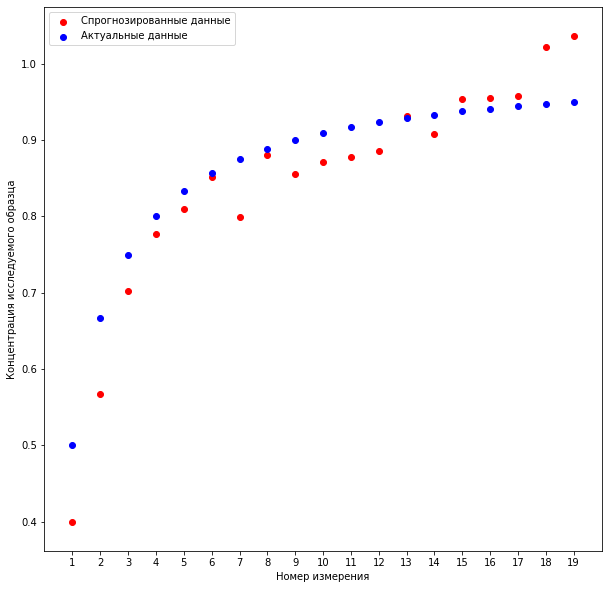

(19, 19) (19, 1)
Root Mean Square Error 
 0.011381980750768649
R^2 Value: 
 0.989786221162221


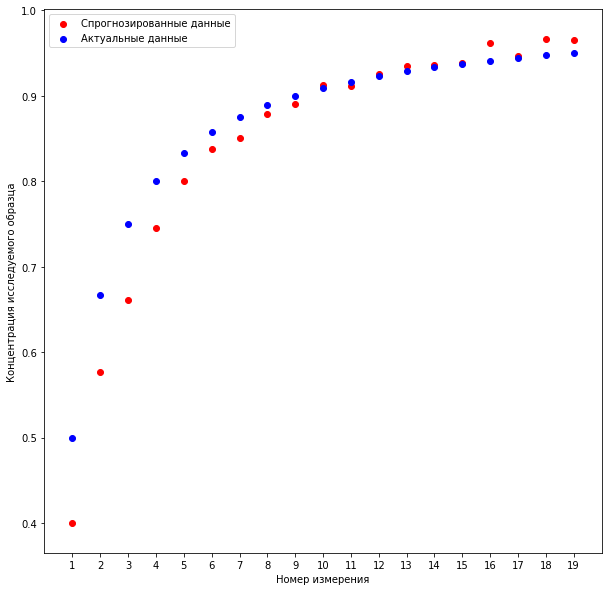

In [61]:
pcr()